# IBM HR Analytics Employee Attrition & Performance

### In this notebook, I will try to predict if an employee whetever the employee is attrition or not

In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Uploading and showing the data

In [2]:
data = pd.read_csv(r'C:\Users\meirk\Desktop\Ariel\data_sceince\WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [3]:
data

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [4]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


My goal is to predict whetever the employee is attrition or not, so lets see how many employees are worn and how many are not worn:

In [5]:
how_many = data['Attrition'].value_counts()
how_many

No     1233
Yes     237
Name: Attrition, dtype: int64

In [6]:
no_precent = (how_many['No'] / len(data)) * 100
yes_precent = (how_many['Yes'] / len(data)) * 100
pd.DataFrame(data = {'No': [no_precent], 'Yes': [yes_precent]})

,No,Yes
0,83.877551,16.122449


As we can see, the majority of the employees, 1233 of them, which are 83.87% are not attrition, and only 237 of them, which are 16.12% are indeed attrition.

Lets try to investigate the causes to the attrition of the employees.

The first possible factor might be the **distance from home:**

,DistanceFromHome
1,208
2,211
3,84
4,64
5,65
6,59
7,84
8,80
9,85
10,86


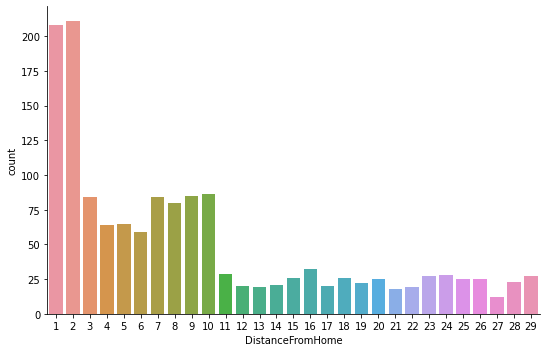

In [7]:
distance_df = pd.DataFrame(data['DistanceFromHome'].value_counts().sort_index(ascending = True))

sns.catplot(data=data,kind='count',height=5,aspect=1.5,x='DistanceFromHome')
distance_df

In [14]:
for i in range(1,30):
    sum_ = len(data.loc[(data['DistanceFromHome'] == i) & (data['Attrition'] == 'Yes')])
    print("In category ", i,", ",sum_, "employees out of ", distance_df['DistanceFromHome'][i] ," are attrition")

In category  1 ,  26 employees out of  208  are attrition
In category  2 ,  28 employees out of  211  are attrition
In category  3 ,  14 employees out of  84  are attrition
In category  4 ,  9 employees out of  64  are attrition
In category  5 ,  10 employees out of  65  are attrition
In category  6 ,  7 employees out of  59  are attrition
In category  7 ,  11 employees out of  84  are attrition
In category  8 ,  10 employees out of  80  are attrition
In category  9 ,  18 employees out of  85  are attrition
In category  10 ,  11 employees out of  86  are attrition
In category  11 ,  4 employees out of  29  are attrition
In category  12 ,  6 employees out of  20  are attrition
In category  13 ,  6 employees out of  19  are attrition
In category  14 ,  4 employees out of  21  are attrition
In category  15 ,  5 employees out of  26  are attrition
In category  16 ,  7 employees out of  32  are attrition
In category  17 ,  5 employees out of  20  are attrition
In category  18 ,  4 employees

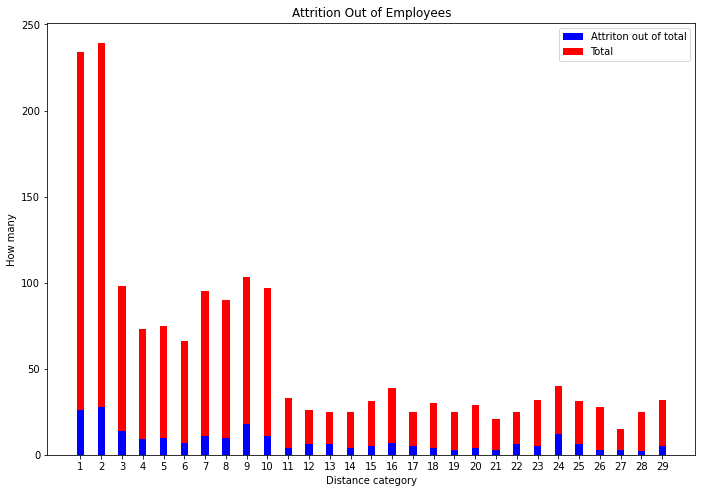

In [99]:
sum_list = []
for i in range(1,30):
    sum_ = len(data.loc[(data['DistanceFromHome'] == i) & (data['Attrition'] == 'Yes')])
    sum_list.append(sum_)
    
ind = np.arange(1,30)
width = 0.35
fig = plt.figure()
ax = fig.add_axes([0,0,1.5,1.5])
ax.bar(ind, np.array(sum_list), width, color = 'b')
ax.bar(ind, np.array(distance_df['DistanceFromHome']), width, bottom = np.array(sum_list), color = 'r')
ax.set_xticks(np.arange(1,30))
ax.set_ylabel("How many")
ax.set_xlabel("Distance category")
ax.set_title('Attrition Out of Employees')
ax.legend(labels = ['Attriton out of total','Total'])

In [152]:
for i in range(len(distance_df)):
    prec = (sum_list[i] /distance_df['DistanceFromHome'][i + 1]) * 100
    print("In category ",i+1, "%.3f" %prec, "precent are attrition")

In category  1 12.500 precent are attrition
In category  2 13.270 precent are attrition
In category  3 16.667 precent are attrition
In category  4 14.062 precent are attrition
In category  5 15.385 precent are attrition
In category  6 11.864 precent are attrition
In category  7 13.095 precent are attrition
In category  8 12.500 precent are attrition
In category  9 21.176 precent are attrition
In category  10 12.791 precent are attrition
In category  11 13.793 precent are attrition
In category  12 30.000 precent are attrition
In category  13 31.579 precent are attrition
In category  14 19.048 precent are attrition
In category  15 19.231 precent are attrition
In category  16 21.875 precent are attrition
In category  17 25.000 precent are attrition
In category  18 15.385 precent are attrition
In category  19 13.636 precent are attrition
In category  20 16.000 precent are attrition
In category  21 16.667 precent are attrition
In category  22 31.579 precent are attrition
In category  23 18.

Another possible factor might be the **relationship satisfaction of the employee:**

,RelationshipSatisfaction
1,276
2,303
3,459
4,432


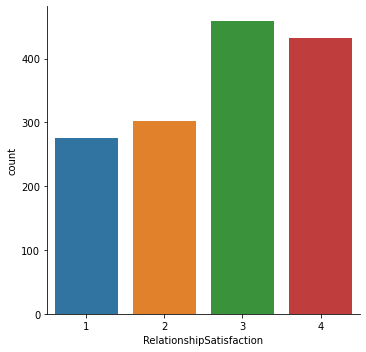

In [97]:
relation_df = pd.DataFrame(data['RelationshipSatisfaction'].value_counts().sort_index(ascending = True))

sns.catplot(data=data,kind='count',height=5,aspect=1,x='RelationshipSatisfaction')
relation_df

In [69]:
rel_list = []
for i in range(1,5):
    sum_ = len(data.loc[(data['RelationshipSatisfaction'] == i) & (data['Attrition'] == 'Yes')])
    rel_list.append(sum_)
    print("In category ", i,", ",sum_, "employees out of ",relation_df['RelationshipSatisfaction'][i] ," are attrition")

In category  1 ,  57 employees out of  276  are attrition
In category  2 ,  45 employees out of  303  are attrition
In category  3 ,  71 employees out of  459  are attrition
In category  4 ,  64 employees out of  432  are attrition


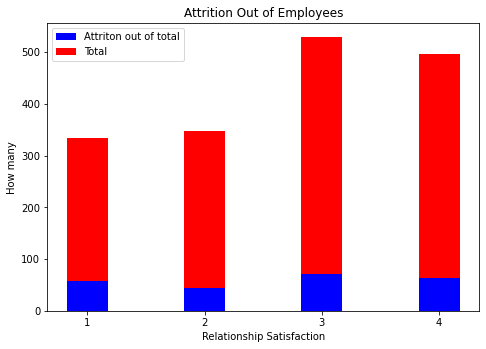

In [90]:
ind = [1,2,3,4]
width = 0.35
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(ind, np.array(rel_list), width, color = 'b')
ax.bar(ind, np.array(relation_df['RelationshipSatisfaction']), width, bottom = np.array(rel_list), color = 'r')
ax.set_xticks(np.arange(1,5))
ax.set_ylabel("How many")
ax.set_xlabel("Relationship Satisfaction")
ax.set_title('Attrition Out of Employees')
ax.legend(labels = ['Attriton out of total','Total'])

In [151]:
for i in range(len(relation_df)):
    prec = (rel_list[i] / relation_df['RelationshipSatisfaction'][i + 1]) * 100
    print("In category ",i+1, "%.3f" %prec, "precent are attrition")

In category  1 20.652 precent are attrition
In category  2 14.851 precent are attrition
In category  3 15.468 precent are attrition
In category  4 14.815 precent are attrition


Another possible factor might be the time that has passed since the **last promotion:**

,YearsSinceLastPromotion
0,581
1,357
2,159
3,52
4,61
5,45
6,32
7,76
8,18
9,17


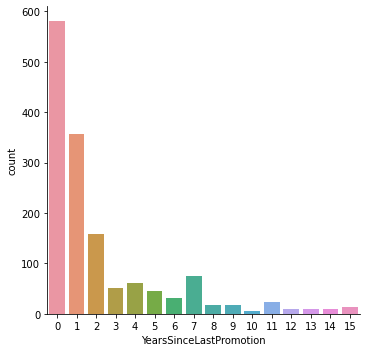

In [100]:
promotion_df = pd.DataFrame(data['YearsSinceLastPromotion'].value_counts().sort_index(ascending = True))

sns.catplot(data=data,kind='count',height=5,aspect=1,x='YearsSinceLastPromotion')
promotion_df

In [111]:
pro_list = []
for i in range(len(promotion_df)):
    sum_ = len(data.loc[(data['YearsSinceLastPromotion'] == i) & (data['Attrition'] == 'Yes')])
    pro_list.append(sum_)
    print("In category ", i,", ",sum_, "employees out of ",promotion_df['YearsSinceLastPromotion'][i] ," are attrition")

In category  0 ,  110 employees out of  581  are attrition
In category  1 ,  49 employees out of  357  are attrition
In category  2 ,  27 employees out of  159  are attrition
In category  3 ,  9 employees out of  52  are attrition
In category  4 ,  5 employees out of  61  are attrition
In category  5 ,  2 employees out of  45  are attrition
In category  6 ,  6 employees out of  32  are attrition
In category  7 ,  16 employees out of  76  are attrition
In category  8 ,  0 employees out of  18  are attrition
In category  9 ,  4 employees out of  17  are attrition
In category  10 ,  1 employees out of  6  are attrition
In category  11 ,  2 employees out of  24  are attrition
In category  12 ,  0 employees out of  10  are attrition
In category  13 ,  2 employees out of  10  are attrition
In category  14 ,  1 employees out of  9  are attrition
In category  15 ,  3 employees out of  13  are attrition


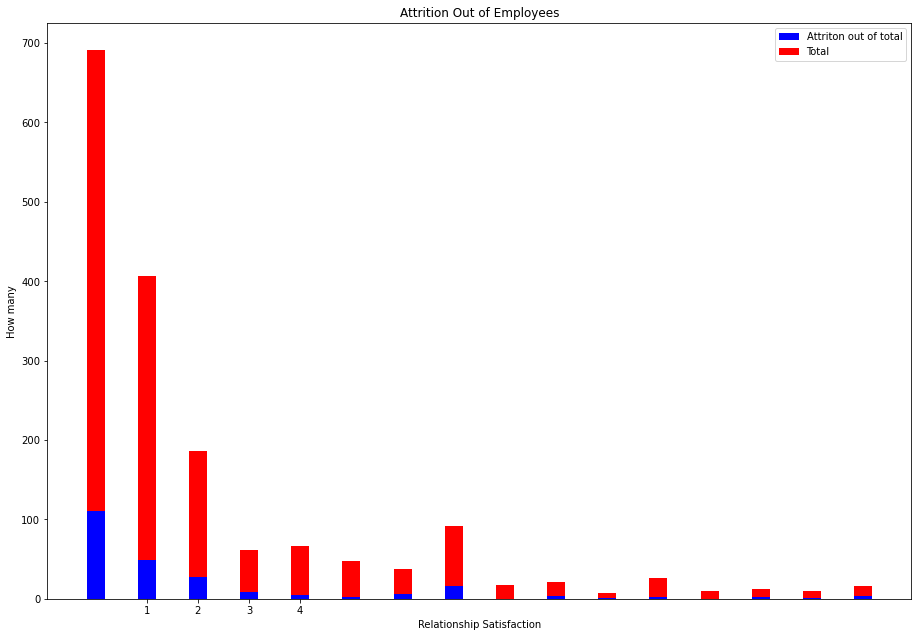

In [117]:
ind = np.arange(16)
width = 0.35
fig = plt.figure()
ax = fig.add_axes([0,0,2,2])
ax.bar(ind, np.array(pro_list), width, color = 'b')
ax.bar(ind, np.array(promotion_df['YearsSinceLastPromotion']), width, bottom = np.array(pro_list), color = 'r')
ax.set_xticks(np.arange(1,5))
ax.set_ylabel("How many")
ax.set_xlabel("Relationship Satisfaction")
ax.set_title('Attrition Out of Employees')
ax.legend(labels = ['Attriton out of total','Total'])

In [113]:
np.array(pro_list).shape

(16,)

In [132]:
for i in range(len(promotion_df)):
    prec = (pro_list[i] / promotion_df['YearsSinceLastPromotion'][i]) * 100
    print("In category ",i, "%.3f" %prec, "precent are attrition")

In category  0 18.933 precent are attrition
In category  1 13.725 precent are attrition
In category  2 16.981 precent are attrition
In category  3 17.308 precent are attrition
In category  4 8.197 precent are attrition
In category  5 4.444 precent are attrition
In category  6 18.750 precent are attrition
In category  7 21.053 precent are attrition
In category  8 0.000 precent are attrition
In category  9 23.529 precent are attrition
In category  10 16.667 precent are attrition
In category  11 8.333 precent are attrition
In category  12 0.000 precent are attrition
In category  13 20.000 precent are attrition
In category  14 11.111 precent are attrition
In category  15 23.077 precent are attrition
